# Regression with Flux

In [1]:
# Background to go here

In [2]:
# Mathematical explanations etc.

## 1. Linear regression

In [3]:
# Insert Math formulas here

In [4]:
using Plots
using Flux
using Flux: throttle

┌ Info: CUDAdrv.jl failed to initialize, GPU functionality unavailable (set JULIA_CUDA_SILENT or JULIA_CUDA_VERBOSE to silence or expand this message)
└ @ CUDAdrv /home/lpaehler/.julia/packages/CUDAdrv/mCr0O/src/CUDAdrv.jl:69


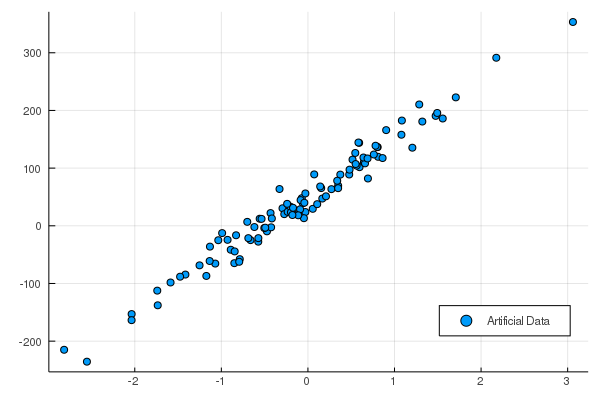

In [5]:
# Generate an artificial dataset
regX = randn(100)
regY = 50 .+ 100 * regX + 20 * randn(100);

# Plot the artificial dataset
scatter(regX, regY, fmt = :png, legend=:bottomright, label="Artificial Data")

### 1.1 Exact regression using linear algebra

In [6]:
# Linear regression with internal algebra system
X = hcat(ones(length(regX)), regX)
Y = regY
intercept, slope = inv(X'*X) * (X'*Y);

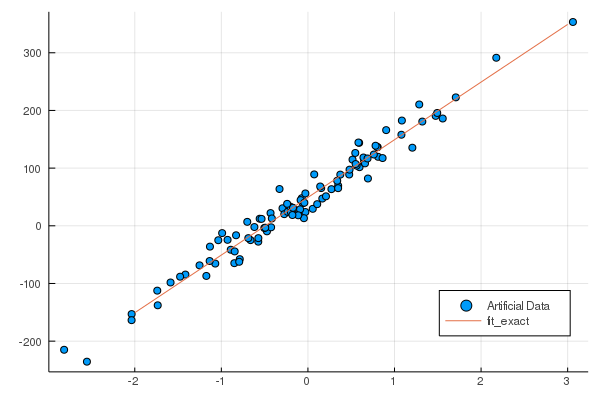

In [7]:
# Plot regression line
plot!((x) -> intercept + slope * x, -3, 3, label="fit_exact")

### 1.2 Regression using Flux

In [8]:
# create data tuples
data = zip(regX, regY)

# Define the model
model = Dense(1, 1, identity)

# Mean-squared error
loss(x, y) = Flux.mse(model([x]), y)

# Callback function
evalcb = () -> @show(sum([loss(i[1], i[2]) for i in data]))

# Training with gradient descent
opt = Descent(0.1)

# Train for 50 epochs
for i = 1:50
    Flux.train!(loss, params(model), data, opt, cb=throttle(evalcb, 10))
end

sum([loss(i[1], i[2]) for i = data]) = 682336.499505431
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = data]) = 32276.55644906196
sum([loss(i[1], i[2]) for i = da

In [9]:
(θ, bias) = collect(params(model))

2-element Array{Any,1}:
 Float32[107.614235]
 Float32[53.18356]  

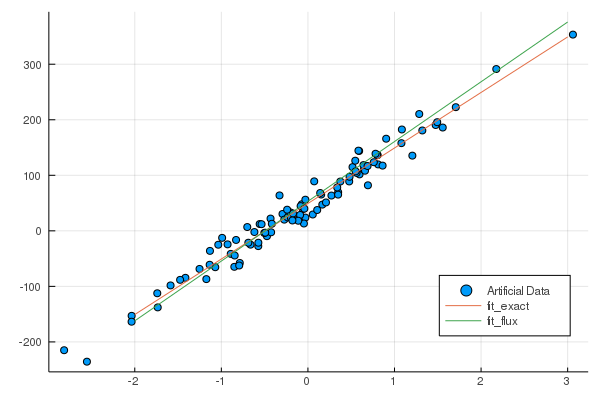

In [10]:
# Plot the line trained with Flux
plot!((x) -> bias[1] + θ[1] * x, -3, 3, label="fit_flux")

## 2. Logistic regression

In [11]:
# Explanation of the concepts behind it

In [12]:
# Explanation of the dataset

In [13]:
using Flux: crossentropy, normalise, onecold, onehotbatch
using Statistics: mean

In [17]:
# Get the labels & features of the Iris dataset
labels = Flux.Data.Iris.labels()
features = Flux.Data.Iris.features();

In [18]:
# explanation of one hot labels to go here

In [20]:
# Normalise features
normed_features = normalise(features, dims=2)

# Split into classes and add one hot labels
klasses = sort(unique(labels))
onehot_labels = onehotbatch(labels, klasses);

In [22]:
# Split into trainings- and test-set
train_indices = [1:3:150; 2:3:150]

X_train = normed_features[:, train_indices]
y_train = onehot_labels[:, train_indices]

X_test = normed_features[:, 3:3:150]
y_test = onehot_labels[:, 3:3:150];

In [24]:
# Example model with 4 features and 3 probabilities as outputs
model = Chain(
    Dense(4, 3),
    softmax
)

loss(x, y) = crossentropy(model(x), y);

In [26]:
# Training configuration
optimiser = Descent(0.5)
data_iterator = Iterators.repeated((X_train, y_train), 200)

Flux.train!(loss, params(model), data_iterator, optimiser)

In [27]:
# Evaluation of trained model
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))

accuracy_score = accuracy(X_test, y_test)

0.96

In [28]:
# Explanation of the confusion matrix concept to go here

In [30]:
# Construct the confusion matrix for the model
function confusion_matrix(X, y)
    y_hat= onehotbatch(onecold(model(X)), 1:3)
    y * y_hat'
end

display(confusion_matrix(X_test, y_test))

3×3 Array{Int64,2}:
 16   0   0
  0  15   2
  0   0  17

## 3. Exercise

In [15]:
# Perform linear/logistic regression on one of the other Flux datasets

In [16]:
# List of Flux datasets to go here